In [1]:
import pandas as pd

# load the training dataset (excluding rows with null values)
penguins = pd.read_csv('penguins.csv').dropna()

# Deep Learning models work best when features are on similar scales
# In a real solution, we'd implement some custom normalization for each feature, but to keep things simple
# we'll just rescale the FlipperLength and BodyMass so they're on a similar scale to the bill measurements
penguins['FlipperLength'] = penguins['FlipperLength']/10
penguins['BodyMass'] = penguins['BodyMass']/100

# Display a random sample of 10 observations
sample = penguins.sample(10)
sample

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
212,45.3,13.8,20.8,42.00,1
172,50.2,14.3,21.8,57.00,1
179,47.8,15.0,21.5,56.50,1
270,47.2,13.7,21.4,49.25,1
205,50.1,15.0,22.5,50.00,1
7,39.2,19.6,19.5,46.75,0
132,36.8,18.5,19.3,35.00,0
162,40.9,13.7,21.4,46.50,1
143,40.7,17.0,19.0,37.25,0
11,37.8,17.3,18.0,37.00,0


In [2]:
penguin_classes = ['Adelie', 'Gentoo', 'Chinstrap']
print(sample.columns[0:5].values, 'SpeciesName')
for index, row in penguins.sample(10).iterrows():
    print('[',row[0], row[1], row[2],row[3], int(row[4]), ']',penguin_classes[int(row[-1])])

['CulmenLength' 'CulmenDepth' 'FlipperLength' 'BodyMass' 'Species'] SpeciesName
[ 49.6 15.0 21.6 47.5 1 ] Gentoo
[ 45.7 17.0 19.5 36.5 2 ] Chinstrap
[ 35.9 16.6 19.0 30.5 0 ] Adelie
[ 49.0 16.1 21.6 55.5 1 ] Gentoo
[ 43.4 14.4 21.8 46.0 1 ] Gentoo
[ 50.5 15.9 22.5 54.0 1 ] Gentoo
[ 46.1 18.2 17.8 32.5 2 ] Chinstrap
[ 39.0 18.7 18.5 36.5 0 ] Adelie
[ 51.5 16.3 23.0 55.0 1 ] Gentoo
[ 40.8 18.4 19.5 39.0 0 ] Adelie


In [3]:
from sklearn.model_selection import train_test_split

features = ['CulmenLength','CulmenDepth','FlipperLength','BodyMass']
label = 'Species'
   
# Split data 70%-30% into training set and test set
x_train, x_test, y_train, y_test = train_test_split(penguins[features].values,
                                                    penguins[label].values,
                                                    test_size=0.30,
                                                    random_state=0)

print ('Training Set: %d, Test Set: %d \n' % (len(x_train), len(x_test)))
print("Sample of features and labels:")

# Take a look at the first 25 training features and corresponding labels
for n in range(0,24):
    print(x_train[n], y_train[n], '(' + penguin_classes[y_train[n]] + ')')

Training Set: 239, Test Set: 103 

Sample of features and labels:
[36.4  17.   19.5  33.25] 0 (Adelie)
[49.  19.6 21.2 43. ] 2 (Chinstrap)
[38.2 20.  19.  39. ] 0 (Adelie)
[39.2 21.1 19.6 41.5] 0 (Adelie)
[49.7 18.6 19.5 36. ] 2 (Chinstrap)
[33.1 16.1 17.8 29. ] 0 (Adelie)
[36.3 19.5 19.  38. ] 0 (Adelie)
[50.1 15.  22.5 50. ] 1 (Gentoo)
[50.4 15.3 22.4 55.5] 1 (Gentoo)
[46.7 15.3 21.9 52. ] 1 (Gentoo)
[41.1  19.   18.2  34.25] 0 (Adelie)
[41.1 17.5 19.  39. ] 0 (Adelie)
[50.7 15.  22.3 55.5] 1 (Gentoo)
[52.  20.7 21.  48. ] 2 (Chinstrap)
[50.8 17.3 22.8 56. ] 1 (Gentoo)
[50.  15.9 22.4 53.5] 1 (Gentoo)
[43.2  19.   19.7  47.75] 0 (Adelie)
[45.2 16.4 22.3 59.5] 1 (Gentoo)
[41.1 18.1 20.5 43. ] 0 (Adelie)
[37.5  18.9  17.9  29.75] 0 (Adelie)
[47.2  13.7  21.4  49.25] 1 (Gentoo)
[49.3 19.9 20.3 40.5] 2 (Chinstrap)
[48.6 16.  23.  58. ] 1 (Gentoo)
[35.5 17.5 19.  37. ] 0 (Adelie)


### Install and import the PyTorch libraries

In [4]:
!pip install torch==1.9.0+cpu torchvision==0.10.0+cpu torchaudio==0.9.0 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html
ERROR: Could not find a version that satisfies the requirement torch==1.9.0+cpu (from versions: 2.0.0, 2.0.1, 2.1.0, 2.1.1, 2.1.2, 2.2.0, 2.2.1, 2.2.2)
ERROR: No matching distribution found for torch==1.9.0+cpu


In [5]:
import torch
import torch.nn as nn
import torch.utils.data as td

# Set random seed for reproducability
torch.manual_seed(0)

print("Libraries imported - ready to use PyTorch", torch.__version__)

Libraries imported - ready to use PyTorch 1.13.1


In [6]:
# Create a dataset and loader for the training data and labels
train_x = torch.Tensor(x_train).float()
train_y = torch.Tensor(y_train).long()
train_ds = td.TensorDataset(train_x,train_y)
train_loader = td.DataLoader(train_ds, batch_size=20,
    shuffle=False, num_workers=1)

# Create a dataset and loader for the test data and labels
test_x = torch.Tensor(x_test).float()
test_y = torch.Tensor(y_test).long()
test_ds = td.TensorDataset(test_x,test_y)
test_loader = td.DataLoader(test_ds, batch_size=20,
    shuffle=False, num_workers=1)
print('Ready to load data')


Ready to load data


### Define a neural network

In [7]:
# Number of hidden layer nodes
hl = 10

# Define the neural network
class PenguinNet(nn.Module):
    def __init__(self):
        super(PenguinNet, self).__init__()
        self.fc1 = nn.Linear(len(features), hl)
        self.fc2 = nn.Linear(hl, hl)
        self.fc3 = nn.Linear(hl, len(penguin_classes))

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        return x

# Create a model instance from the network
model = PenguinNet()
print(model)

PenguinNet(
  (fc1): Linear(in_features=4, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=10, bias=True)
  (fc3): Linear(in_features=10, out_features=3, bias=True)
)


### Train the model

In [8]:
def train(model, data_loader, optimizer):
    # Set the model to training mode
    model.train()
    train_loss = 0
    
    for batch, tensor in enumerate(data_loader):
        data, target = tensor
        #feedforward
        optimizer.zero_grad()
        out = model(data)
        loss = loss_criteria(out, target)
        train_loss += loss.item()

        # backpropagate
        loss.backward()
        optimizer.step()

    #Return average loss
    avg_loss = train_loss / (batch+1)
    print('Training set: Average loss: {:.6f}'.format(avg_loss))
    return avg_loss
           
            
def test(model, data_loader):
    # Switch the model to evaluation mode (so we don't backpropagate)
    model.eval()
    test_loss = 0
    correct = 0

    with torch.no_grad():
        batch_count = 0
        for batch, tensor in enumerate(data_loader):
            batch_count += 1
            data, target = tensor
            # Get the predictions
            out = model(data)

            # calculate the loss
            test_loss += loss_criteria(out, target).item()

            # Calculate the accuracy
            _, predicted = torch.max(out.data, 1)
            correct += torch.sum(target==predicted).item()
            
    # Calculate the average loss and total accuracy for this epoch
    avg_loss = test_loss/batch_count
    print('Validation set: Average loss: {:.6f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        avg_loss, correct, len(data_loader.dataset),
        100. * correct / len(data_loader.dataset)))
    
    # return average loss for the epoch
    return avg_loss

# Specify the loss criteria (we'll use CrossEntropyLoss for multi-class classification)
loss_criteria = nn.CrossEntropyLoss()

# Use an "Adam" optimizer to adjust weights
# (see https://pytorch.org/docs/stable/optim.html#algorithms for details of supported algorithms)
learning_rate = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
optimizer.zero_grad()

# We'll track metrics for each epoch in these arrays
epoch_nums = []
training_loss = []
validation_loss = []

# Train over 50 epochs
epochs = 50
for epoch in range(1, epochs + 1):

    # print the epoch number
    print('Epoch: {}'.format(epoch))
    
    # Feed training data into the model to optimize the weights
    train_loss = train(model, train_loader, optimizer)
    
    # Feed the test data into the model to check its performance
    test_loss = test(model, test_loader)
    
    # Log the metrics for this epoch
    epoch_nums.append(epoch)
    training_loss.append(train_loss)
    validation_loss.append(test_loss)

Epoch: 1
Training set: Average loss: 1.263108
Validation set: Average loss: 1.145636, Accuracy: 35/103 (34%)

Epoch: 2
Training set: Average loss: 1.101021
Validation set: Average loss: 1.046173, Accuracy: 35/103 (34%)

Epoch: 3
Training set: Average loss: 1.041146
Validation set: Average loss: 1.025570, Accuracy: 35/103 (34%)

Epoch: 4
Training set: Average loss: 1.024385
Validation set: Average loss: 1.016071, Accuracy: 35/103 (34%)

Epoch: 5
Training set: Average loss: 1.013260
Validation set: Average loss: 1.004553, Accuracy: 35/103 (34%)

Epoch: 6
Training set: Average loss: 0.999791
Validation set: Average loss: 0.992066, Accuracy: 42/103 (41%)

Epoch: 7
Training set: Average loss: 0.985211
Validation set: Average loss: 0.977807, Accuracy: 45/103 (44%)

Epoch: 8
Training set: Average loss: 0.969658
Validation set: Average loss: 0.962451, Accuracy: 48/103 (47%)

Epoch: 9
Training set: Average loss: 0.952731
Validation set: Average loss: 0.945892, Accuracy: 51/103 (50%)

Epoch: 10


### Review training and validation loss

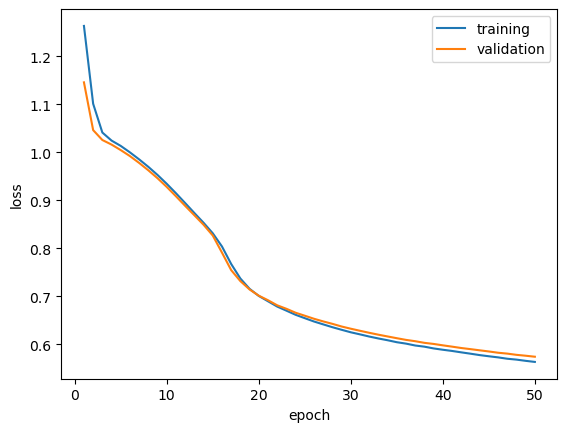

In [9]:
%matplotlib inline
from matplotlib import pyplot as plt

plt.plot(epoch_nums, training_loss)
plt.plot(epoch_nums, validation_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

### View the learned weights and biases

In [10]:
for param_tensor in model.state_dict():
    print(param_tensor, "\n", model.state_dict()[param_tensor].numpy())

fc1.weight 
 [[-0.00374341  0.2682218  -0.41152257 -0.3679695 ]
 [-0.20819442 -0.12638947  0.05244911  0.5527918 ]
 [-0.04437202  0.13230628 -0.15110654 -0.09828269]
 [-0.47767425 -0.33114105 -0.20611155  0.01852179]
 [ 0.24660896  0.4662262  -0.34132314 -0.19457649]
 [ 0.25643742  0.3206984  -0.16103233  0.3760003 ]
 [-0.08059168  0.05290705  0.4527381  -0.46383518]
 [-0.35442698 -0.1635044  -0.2342795   0.39151204]
 [-0.32408983 -0.23016644 -0.34932023 -0.4682805 ]
 [-0.37851545  0.7094527   0.27856812  0.17404774]]
fc1.bias 
 [ 0.02629578 -0.30978897  0.08459234 -0.46684736 -0.32715458 -0.3628641
  0.31546897  0.2544456  -0.22174752  0.1624455 ]
fc2.weight 
 [[ 0.20224684  0.31437248  0.12550516  0.04272011  0.21202639 -0.18619564
   0.05892716 -0.24517313 -0.21917309 -0.16335806]
 [ 0.14308454  0.04697713 -0.18731831  0.09553465  0.54126835  0.0100054
   0.01207406  0.04253309  0.1961803   0.5200713 ]
 [-0.24369256 -0.10029172  0.12428064  0.2620103   0.43496463  0.28478807
   0.06

### Evaluate model performance

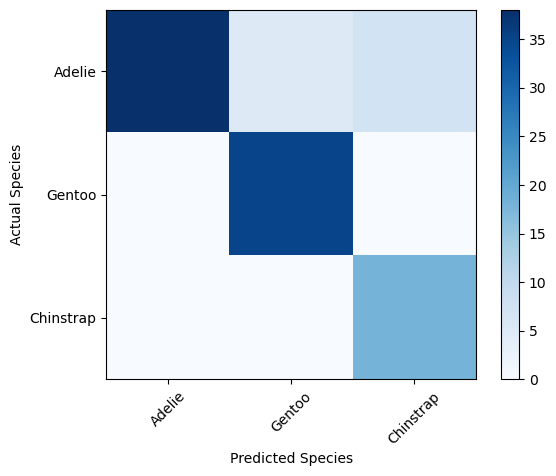

In [11]:
#Pytorch doesn't have a built-in confusion matrix metric, so we'll use SciKit-Learn
from sklearn.metrics import confusion_matrix
import numpy as np

# Set the model to evaluate mode
model.eval()

# Get predictions for the test data
x = torch.Tensor(x_test).float()
_, predicted = torch.max(model(x).data, 1)

# Plot the confusion matrix
cm = confusion_matrix(y_test, predicted.numpy())
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(penguin_classes))
plt.xticks(tick_marks, penguin_classes, rotation=45)
plt.yticks(tick_marks, penguin_classes)
plt.xlabel("Predicted Species")
plt.ylabel("Actual Species")
plt.show()

### Model Save

In [12]:
# Save the model weights
model_file = 'models/penguin_classifier.pt'
torch.save(model.state_dict(), model_file)
del model
print('model saved as', model_file)

model saved as models/penguin_classifier.pt


### Use the trained model

In [13]:
# New penguin features
x_new = [[50.4,15.3,20,50]]
print ('New sample: {}'.format(x_new))

# Create a new model class and load weights
model = PenguinNet()
model.load_state_dict(torch.load(model_file))

# Set model to evaluation mode
model.eval()

# Get a prediction for the new data sample
x = torch.Tensor(x_new).float()
_, predicted = torch.max(model(x).data, 1)

print('Prediction:',penguin_classes[predicted.item()])

New sample: [[50.4, 15.3, 20, 50]]
Prediction: Gentoo
